In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap

In [2]:
# Enlace al archivo CSV en repositorio
url = 'https://raw.githubusercontent.com/lfot/Py_DDS_trabajo_final/main/data/df_ok.csv'

# Leer el DataFrame desde el archivo CSV desde repositorio
df_ok = pd.read_csv(url, sep=';')

**A continuación se presentan análisis relevantes de carácter preliminar respecto de algunas variables del df**

Declaración de voto en el plebiscito ('constitucion_4_b'), según: 'zona_u_r', 'iden_pol_2', 'confianza_8_a', 'interes_pol_1_b', 'democracia_21', 'democracia_19', 'gse'.

Si bien se pueden realizar otro tipo de combinaciones, éstas son referenciales para objeto del trabajo final.

**Cruces de variables**

Incluye ajustes para ordenar categorías de variables específicas, considerando el nombre de las mismas que comienzan por número y las reconoce como un texto. 

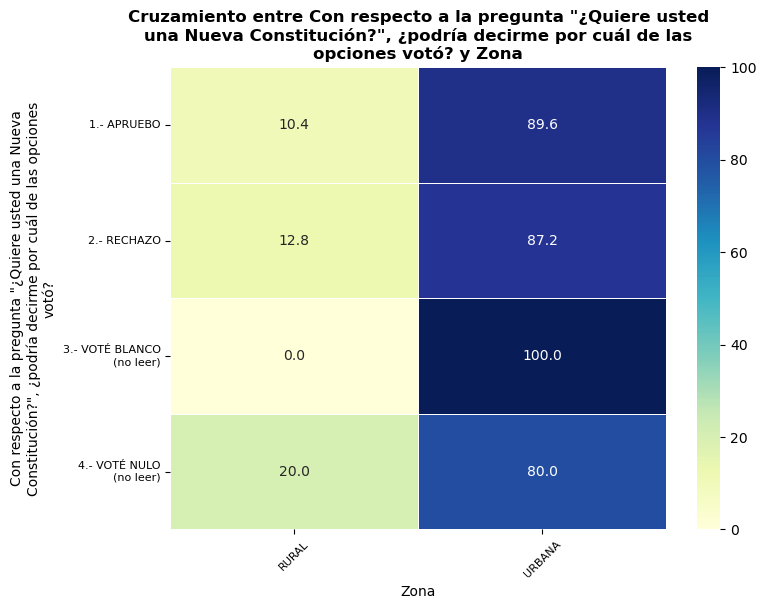

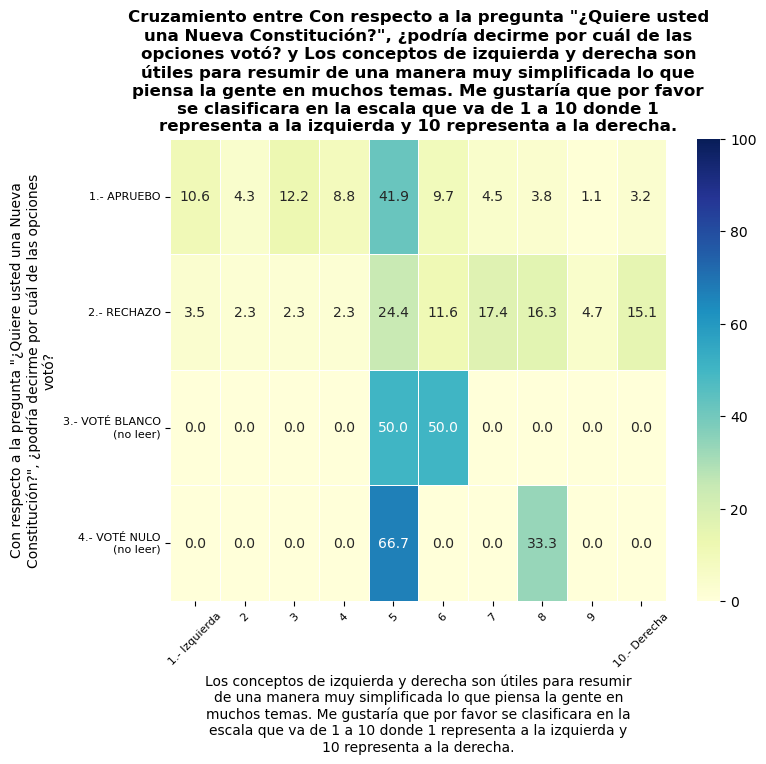

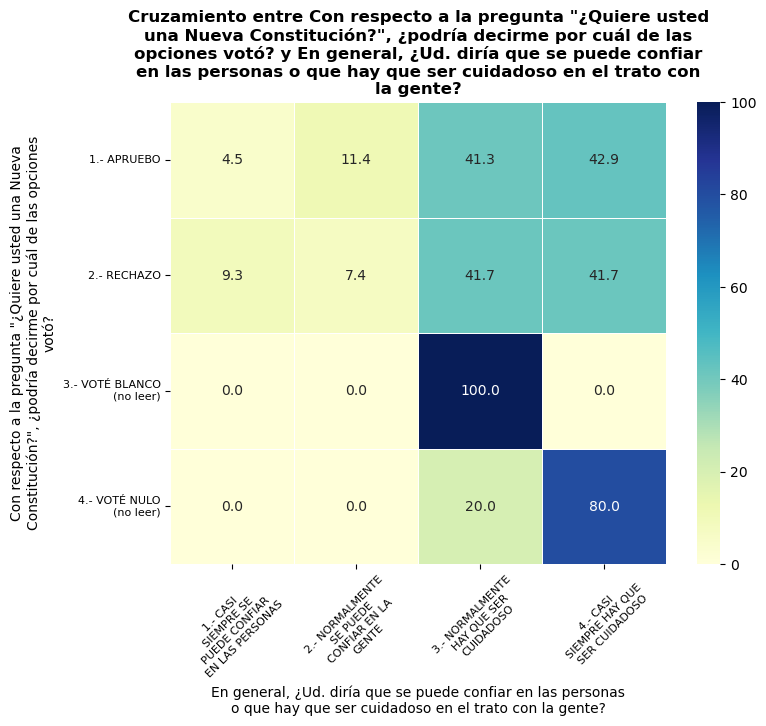

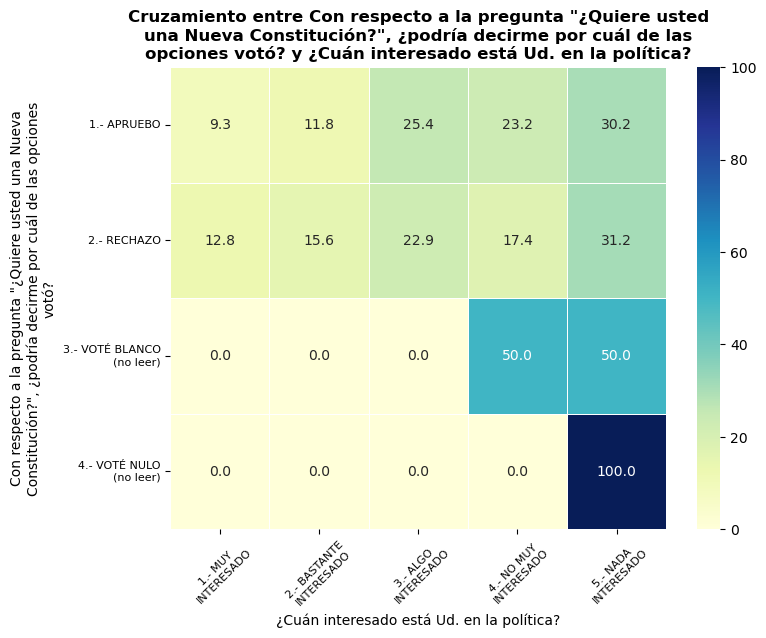

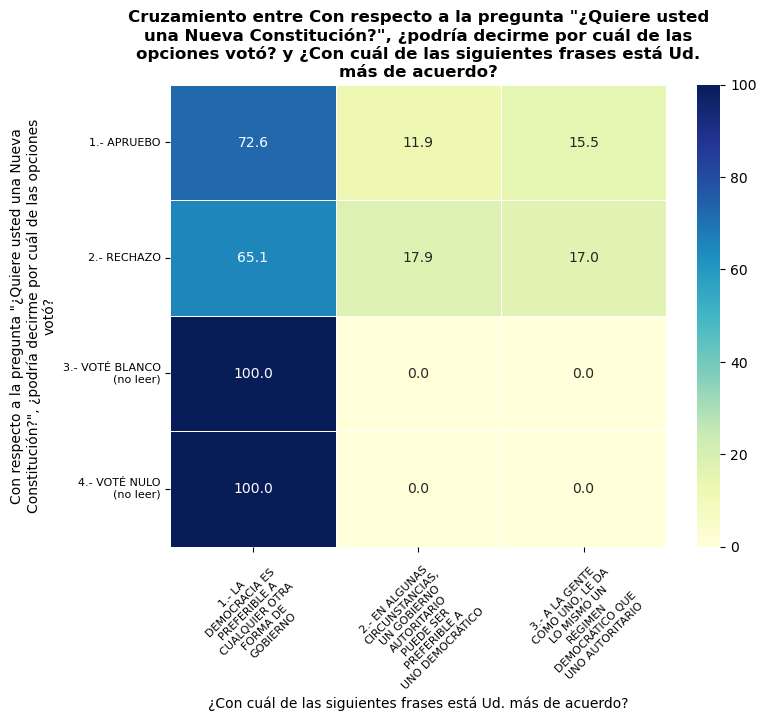

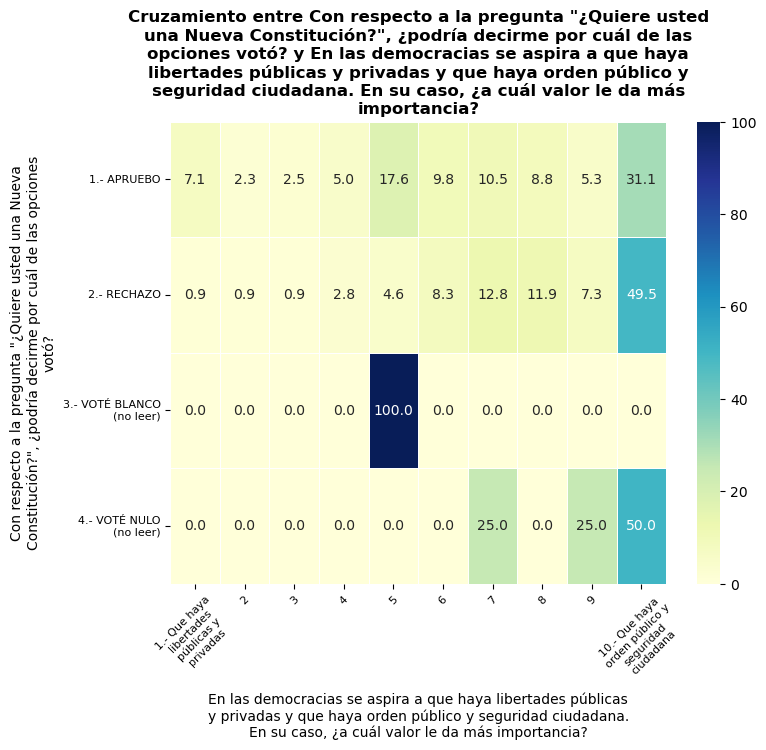

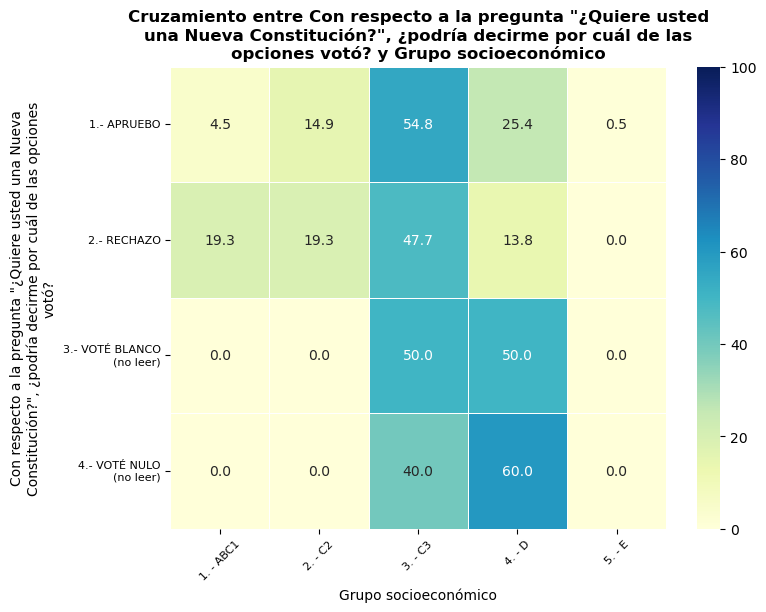

In [3]:
# Descripciones para títulos de las variables
titles = {
    'zona_u_r': 'Zona',
    'eval_gob_1': 'Independientemente de su posición política, ¿Ud. aprueba o desaprueba la forma como Sebastián Piñera está conduciendo su gobierno?',
    'iden_pol_2': 'Los conceptos de izquierda y derecha son útiles para resumir de una manera muy simplificada lo que piensa la gente en muchos temas. Me gustaría que por favor se clasificara en la escala que va de 1 a 10 donde 1 representa a la izquierda y 10 representa a la derecha.',
    'confianza_8_a': 'En general, ¿Ud. diría que se puede confiar en las personas o que hay que ser cuidadoso en el trato con la gente?',
    'interes_pol_1_b': '¿Cuán interesado está Ud. en la política?',
    'democracia_21': '¿Con cuál de las siguientes frases está Ud. más de acuerdo?',
    'democracia_19': 'En las democracias se aspira a que haya libertades públicas y privadas y que haya orden público y seguridad ciudadana. En su caso, ¿a cuál valor le da más importancia?',
    'constitucion_4_a': '¿Votó Ud. en el plebiscito sobre una nueva constitución realizado en octubre del año pasado?',
    'constitucion_4_b': 'Con respecto a la pregunta "¿Quiere usted una Nueva Constitución?", ¿podría decirme por cuál de las opciones votó?',
    'estallido_5': 'Con respecto a las manifestaciones que empezaron en octubre 2019, Ud. diría que…',
    'sexo': 'Sexo',
    'edad': 'Edad',
    'bienestar_21': 'Considerando todos los ingresos percibidos por su familia, esto es, todos los ingresos que reciben ustedes, ¿cuál de las frases que aparecen en esta tarjeta cree Ud. que se ajusta mejor a su situación de ingresos?',
    'gse': 'Grupo socioeconómico'
}

# Orden personalizado para algunas variables específicas
order_dict = {
    'iden_pol_2': [
        '1.- Izquierda', '2', '3', '4', '5', 
        '6', '7', '8', '9', '10.- Derecha', 
        'NaN'
    ],
    'eval_gob_1': [
        '1. - APRUEBA', '2. - DESAPRUEBA', 
        '3. - (no leer) NO APRUEBA NI DESAPRUEBA', 'NaN'
    ],
    'democracia_19': [
        '1.- Que haya libertades públicas y privadas', 
        '2', '3', '4', '5', '6', '7', '8', 
        '9', '10.- Que haya orden público y seguridad ciudadana', 
        'NaN'
    ],
    'constitucion_4_b': [
        '1.- APRUEBO', '2.- RECHAZO', 
        '3.- VOTÉ BLANCO (no leer)', '4.- VOTÉ NULO (no leer)', 
        'NaN'
    ],
    'constitucion_4_a': [
        'Si', 'No', 'NaN'
    ]
}

# Función para ajustar el título largo descriptivo
def wrap_title(title, width=60):
    return '\n'.join(textwrap.wrap(title, width=width))

# Función para graficar cruces con porcentajes y ajustar etiquetas
def plot_cross_tab_percentage(variable1, variable2):
    # Crear una tabla cruzada
    cross_tab = pd.crosstab(df_ok[variable1], df_ok[variable2])
    
    # Calcular porcentajes
    cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    
    # Convertir la tabla cruzada en formato largo para Seaborn
    cross_tab_long = cross_tab_percentage.reset_index().melt(id_vars=variable1, var_name=variable2, value_name='Porcentaje')
    
    # Ordenar las categorías según el orden especificado
    if variable1 in order_dict:
        order1 = order_dict[variable1]
    else:
        order1 = sorted(df_ok[variable1].dropna().unique())
    
    if variable2 in order_dict:
        order2 = order_dict[variable2]
    else:
        order2 = sorted(df_ok[variable2].dropna().unique())
    
    # Convertir las columnas a categorías ordenadas
    cross_tab_long[variable1] = pd.Categorical(cross_tab_long[variable1], categories=order1, ordered=True)
    cross_tab_long[variable2] = pd.Categorical(cross_tab_long[variable2], categories=order2, ordered=True)
    
    # Ordenar el DataFrame para asegurar que los datos se grafican en el orden correcto
    cross_tab_long = cross_tab_long.sort_values(by=[variable1, variable2])

    # Graficar la tabla cruzada con tamaño reducido
    plt.figure(figsize=(8, 6))  # Tamaño reducido
    ax = sns.heatmap(cross_tab_long.pivot(index=variable1, columns=variable2, values='Porcentaje'),
                     annot=True, fmt=".1f", cmap="YlGnBu", cbar=True, linewidths=.5, vmin=0, vmax=100)
    
    # Ajustar el título y etiquetas
    plt.title(wrap_title(f'Cruzamiento entre {titles[variable1]} y {titles[variable2]}'), fontsize=12, fontweight='bold')
    plt.xlabel(wrap_title(titles[variable2]), fontsize=10)
    plt.ylabel(wrap_title(titles[variable1]), fontsize=10)
    
    # Ajustar etiquetas de los ejes
    x_labels = [textwrap.fill(label.get_text(), width=15) for label in ax.get_xticklabels()]
    y_labels = [textwrap.fill(label.get_text(), width=15) for label in ax.get_yticklabels()]
    
    ax.set_xticklabels(x_labels, fontsize=8, rotation=45)
    ax.set_yticklabels(y_labels, fontsize=8, rotation=0)
    
    plt.show()

# Lista de variables de interés
variables_de_interes = ['zona_u_r', 'iden_pol_2', 'confianza_8_a', 'interes_pol_1_b', 'democracia_21', 'democracia_19', 'gse']

# Generar gráficos de cruces para las variables de interés con la variable de votación
for var in variables_de_interes:
    plot_cross_tab_percentage('constitucion_4_b', var)


**Interpretación descriptiva de los cruces** (No considera estadística inferencial)